In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [221]:
housing= pd.read_csv("housing.csv")

In [222]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [223]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [224]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [225]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Visualization of Data

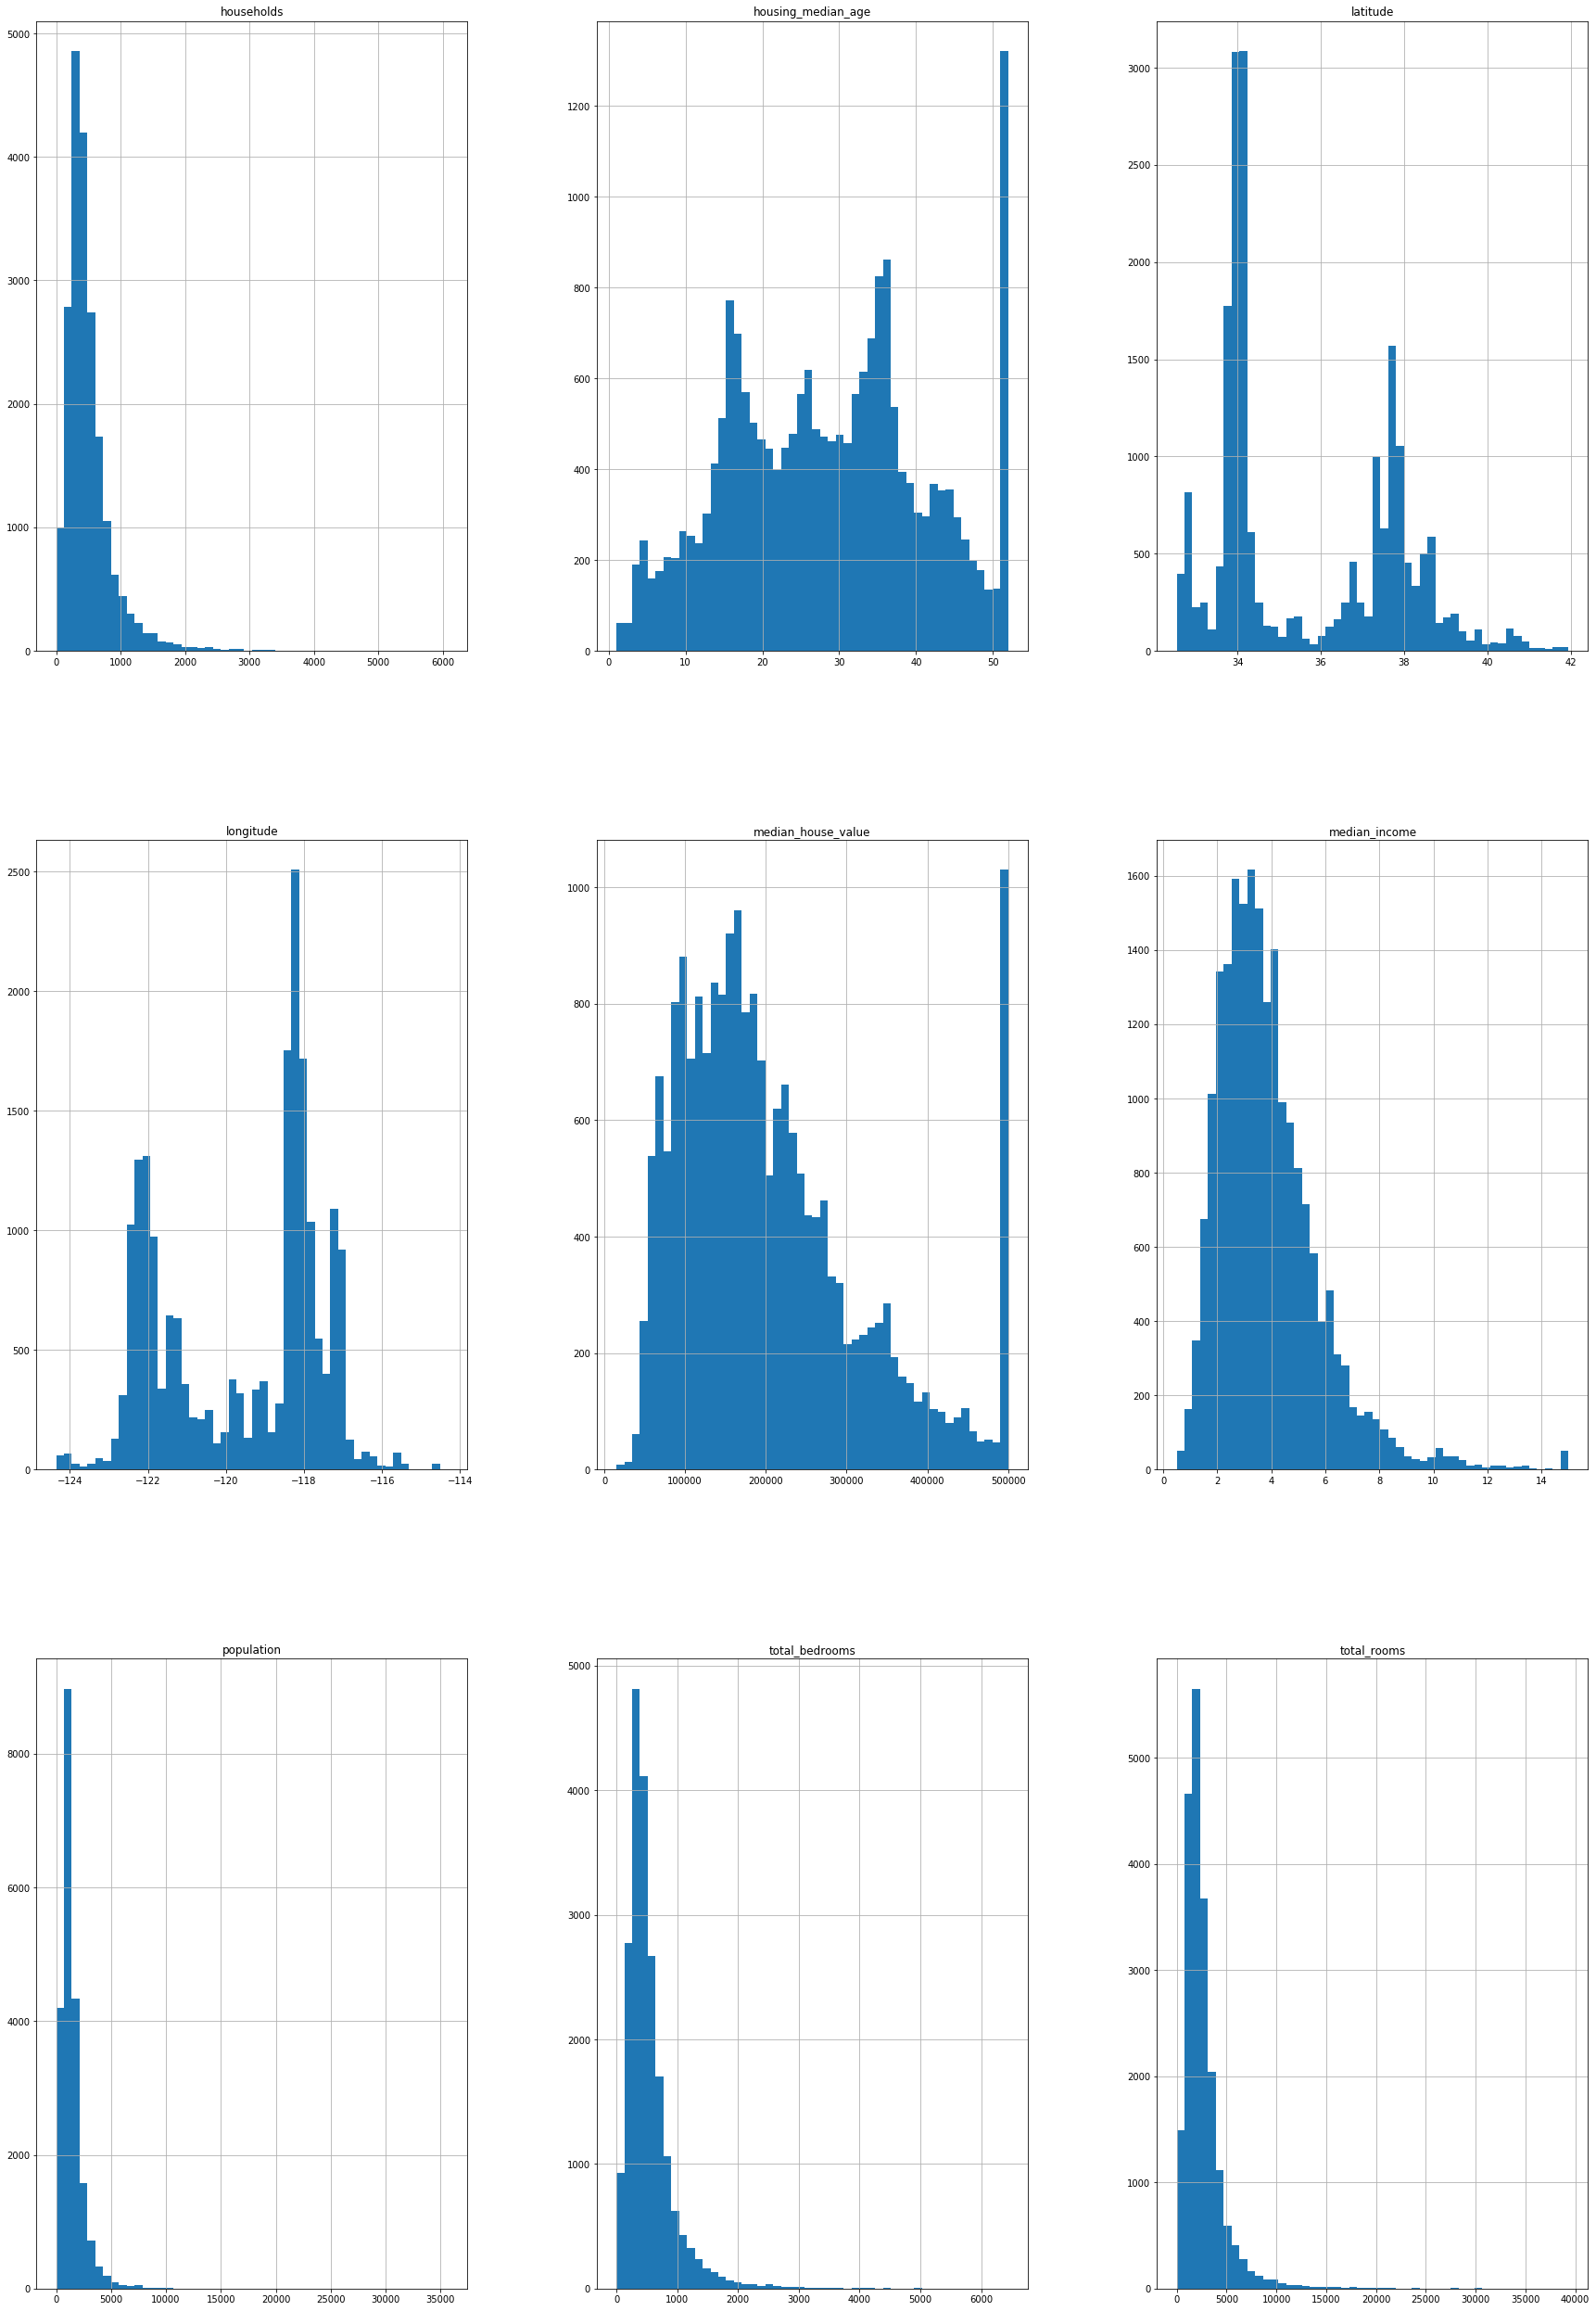

In [226]:
housing.hist(bins=50, figsize=(30,45))
plt.show()

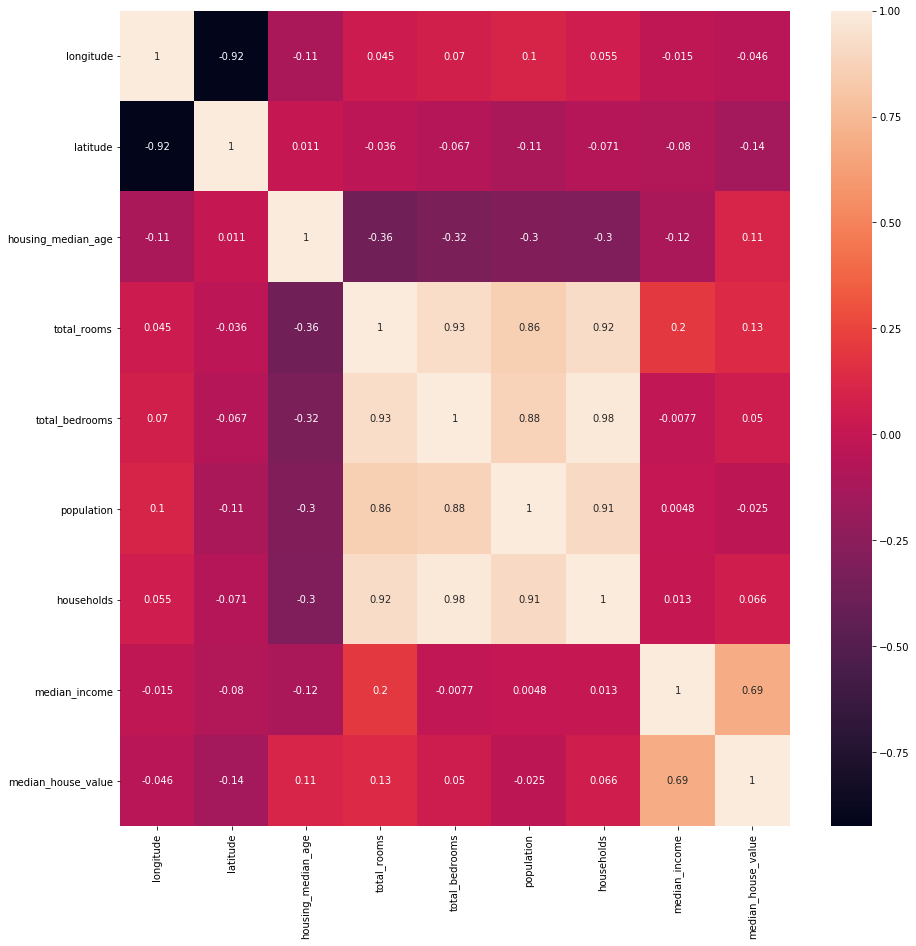

In [227]:
cor=housing.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor , annot=True)

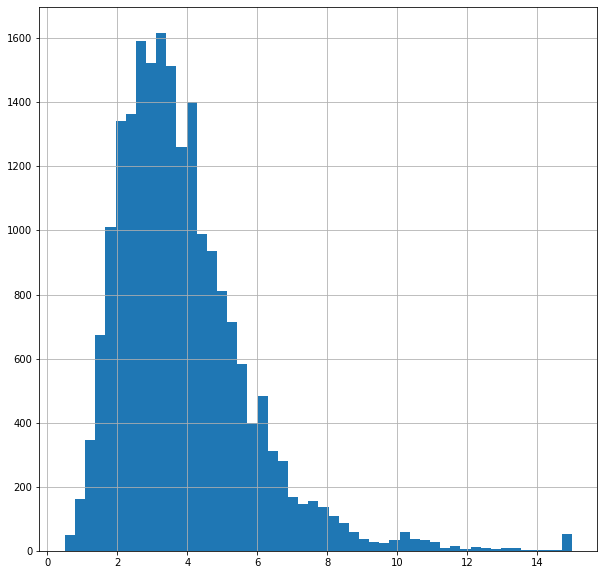

In [228]:
housing['median_income'].hist(bins=50,figsize=(10,10))


In [229]:
from sklearn.model_selection import train_test_split

In [230]:
#random sampling
train_set1, test_set1 = train_test_split(housing, test_size=0.2,random_state=42)

In [231]:
train_set1.shape, test_set1.shape

((16512, 10), (4128, 10))

# Pre-Processing 

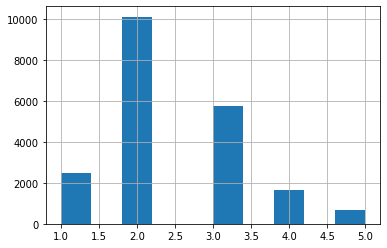

In [232]:
# If we look at the histogram of the 'median_income' we created before, you will observe that
#that most of median income values are clustered around 1.5 t0 7 (i.e $15,000-$70,000), but 
#some 'median_income' values go far beyond 7.
#So 5 strata were created in this project.We will create 5 category attribute labeled 1 to 5
#(where label 1 depicts values from 0-2,label 2 depicts values from 2-4 an so on till label 
#5 depicts 8-inf which covers the remaining values on the histogram)

housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 2., 4., 6., 8., np.inf],
labels=[1,2,3,4,5])
housing["income_cat"].hist()

### Stratified Sampling

In [233]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
split.get_n_splits(housing)

split = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    print("Train :",train_index , "Test :" , test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Train : [  249  2355 11234 ...  8907 16805 15084] Test : [ 3700 20333 19723 ...  6766 10281  4768]
Train : [ 8516 19217  7277 ... 15667 16446  5510] Test : [   47 14670  1686 ...   637 10498  5796]
Train : [16129 10810 18408 ... 12111  5892  6510] Test : [11369  3998  3645 ... 16092  7717 12829]
Train : [1174 1603 4697 ... 3802 1700 6554] Test : [ 4282 20485 13235 ...  4140  3094 15970]
Train : [10500  8052  6102 ...  6253 13076  1579] Test : [14081   573  1241 ...  8231  3517  6206]


In [234]:
len(strat_test_set)

4128

In [235]:
strat_test_set["income_cat"].value_counts()

2    2019
3    1145
1     492
4     334
5     138
Name: income_cat, dtype: int64

In [236]:
#the proportion of the split as compared with the ‘income_cat’ histogram.
#it is observed that the data were split in accordance to the strata in the ‘income_cat’ histogram
strat_test_set["income_cat"].value_counts() /len(strat_test_set)

2    0.489099
3    0.277374
1    0.119186
4    0.080911
5    0.033430
Name: income_cat, dtype: float64

In [237]:
strat_train_set.shape, strat_test_set.shape

((16512, 11), (4128, 11))

In [238]:
#We then remove this new attribute later on to get the original data back.
#The only reason to remove it is you want to get the original data back.
#In other words we start with x amount of attributes for each data point, 
#(one of which is 'median_income'), we add a new attribute to each data point 
#('income_cat') so we now have x+1 attributes for each data point. 
#We then remove the data point later as he wants to get his original data back.
strat_train_set = strat_train_set.drop('income_cat', axis=1)
strat_test_set = strat_test_set.drop('income_cat', axis=1)

In [239]:
#if the training set is very large, you may want to sample an exploration
#set, to make manipulations easy and fast. In our case, the set is quite small, so you can
#just work directly on the full set.You create a copy of the dataset to play with it
#without harming the training set
housing = strat_train_set.copy()

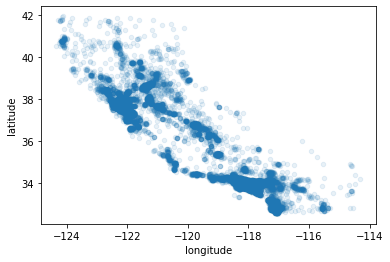

In [240]:
#setting alpha makes it easier to viw high density data points
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) 

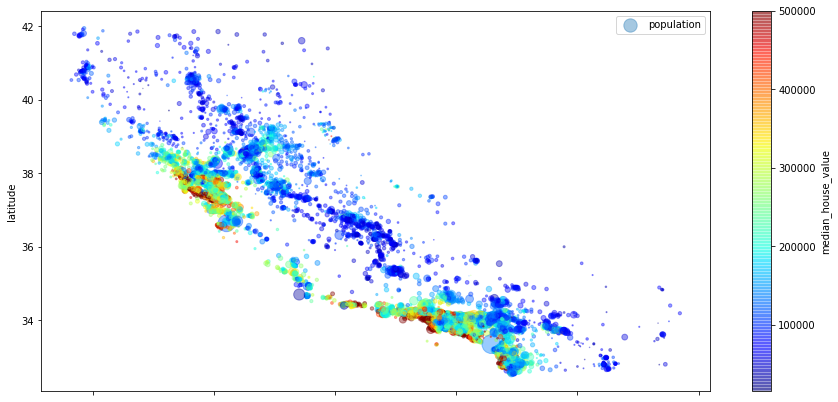

In [241]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(15,7))
plt.legend()

### Correlation

In [304]:
#We can calculate the correlation between each pair of attributes using pandas scatter_matrix() or
#Heatmap

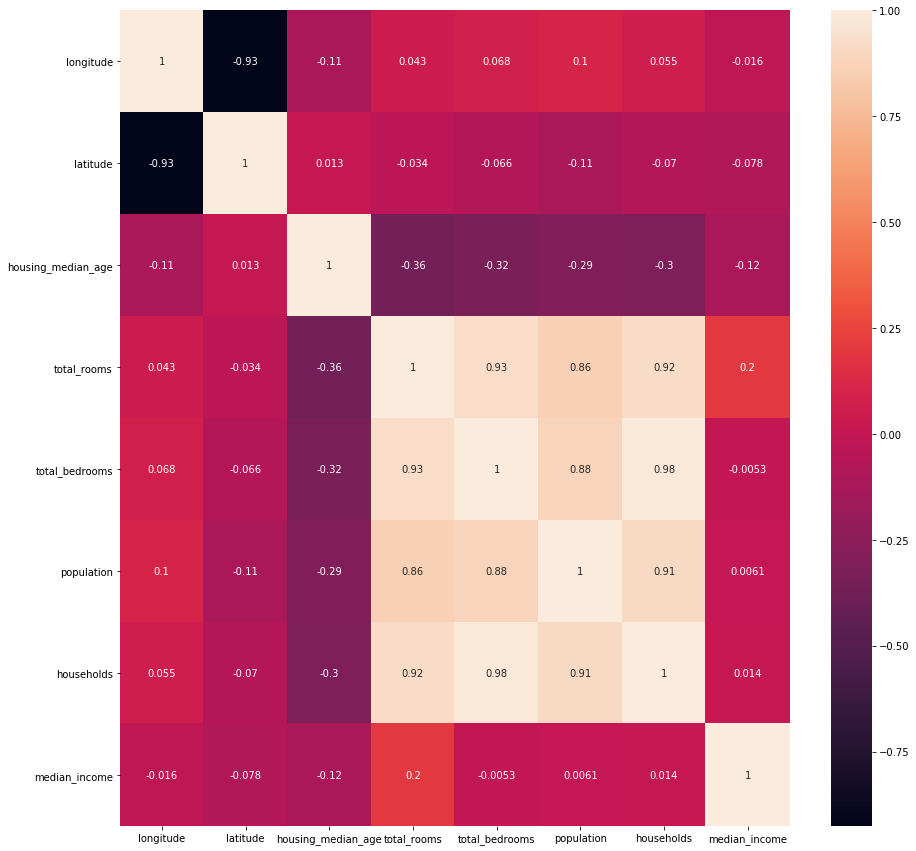

In [303]:
cor=housing.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor , annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000185A1AF7688>,
      dtype=object)

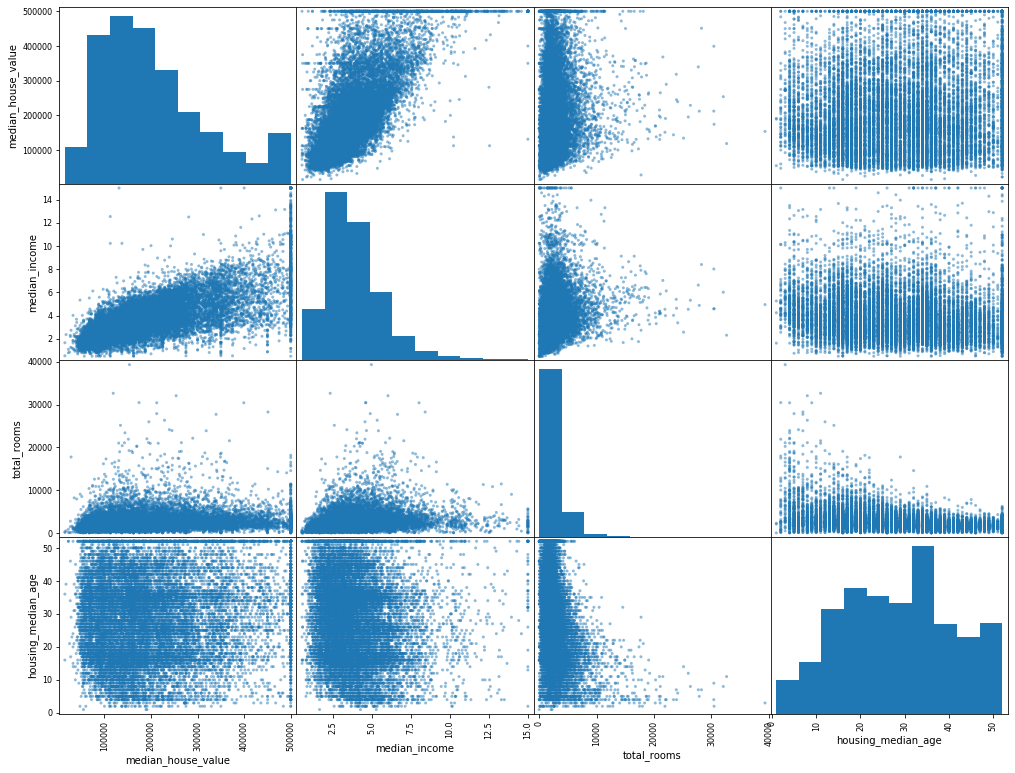

In [243]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(17, 13))

In [244]:
correlation=housing.corr()
correlation["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687540
total_rooms           0.133661
housing_median_age    0.104040
households            0.065183
total_bedrooms        0.050228
population           -0.023391
longitude            -0.045352
latitude             -0.143686
Name: median_house_value, dtype: float64

In [245]:
#You can clearly see "median_income" has a very high positive correlation with "median_house_value" 

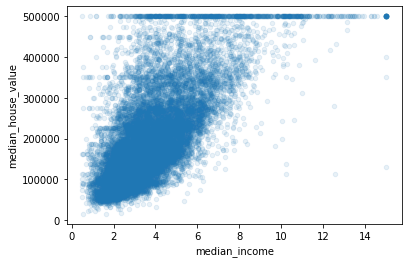

In [246]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [247]:
#correlation is very strong(upward trend),the horizontal line at approx 500,000 represents uper capping

In [248]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10500,-117.69,33.47,23.0,3499.0,722.0,1480.0,634.0,3.8600,300000.0,<1H OCEAN
8052,-118.19,33.84,44.0,2731.0,577.0,1396.0,555.0,4.1771,219100.0,NEAR OCEAN
6102,-117.89,34.11,36.0,806.0,147.0,446.0,153.0,4.5221,151300.0,<1H OCEAN
7098,-117.99,33.92,27.0,5805.0,1152.0,3106.0,1144.0,4.0610,222700.0,<1H OCEAN
19046,-121.85,38.43,2.0,790.0,135.0,235.0,87.0,5.0862,166500.0,INLAND


In [249]:
#See these three attributes above? => total_rooms, total_bedrooms, population
#They are for an entire district
#It would be feasible to find them per household because we are predicting per house price

In [250]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
10500,-117.69,33.47,23.0,3499.0,722.0,1480.0,634.0,3.8600,300000.0,<1H OCEAN,5.518927,0.206345,2.334385
8052,-118.19,33.84,44.0,2731.0,577.0,1396.0,555.0,4.1771,219100.0,NEAR OCEAN,4.920721,0.211278,2.515315
6102,-117.89,34.11,36.0,806.0,147.0,446.0,153.0,4.5221,151300.0,<1H OCEAN,5.267974,0.182382,2.915033
7098,-117.99,33.92,27.0,5805.0,1152.0,3106.0,1144.0,4.0610,222700.0,<1H OCEAN,5.074301,0.198450,2.715035
19046,-121.85,38.43,2.0,790.0,135.0,235.0,87.0,5.0862,166500.0,INLAND,9.080460,0.170886,2.701149


In [251]:
correlation=housing.corr()
correlation['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687540
rooms_per_household         0.149694
total_rooms                 0.133661
housing_median_age          0.104040
households                  0.065183
total_bedrooms              0.050228
population_per_household   -0.022178
population                 -0.023391
longitude                  -0.045352
latitude                   -0.143686
bedrooms_per_room          -0.254871
Name: median_house_value, dtype: float64

# Data Cleaning

In [253]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [254]:
#total_bedrooms had some missing values
#We can fix this in 3 ways
#remove the instances(rows) of missing values
#remove the entire attribute
#set missing value to some value like zero, median or mean

In [255]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [256]:
#Since the median can only be computed on numerical attributes, you need to create a
#copy of the data without the text attribute ocean_proximity
# Then fit the imputer instance to the training data using the fit() method

In [257]:
X = imputer.transform(housing_num)
housing_X = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)

In [258]:
#Now you can use this “trained” imputer to transform the training set by replacing
#missing values with the learned medians -> this will return a NumPy array
#Let's put it back in the dataframe

In [259]:
housing_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 10500 to 1579
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.1 MB


In [260]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
10500,<1H OCEAN
8052,NEAR OCEAN
6102,<1H OCEAN
7098,<1H OCEAN
19046,INLAND
5802,<1H OCEAN
18627,<1H OCEAN
8984,<1H OCEAN
5138,<1H OCEAN
9865,<1H OCEAN


In [261]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_ordinal= ordinal_encoder.fit_transform(housing_cat)
housing_cat_ordinal

array([[0.],
       [4.],
       [0.],
       ...,
       [0.],
       [1.],
       [3.]])

In [262]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [263]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_hot=cat_encoder.fit_transform(housing_cat)
housing_cat_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [264]:
housing_cat_hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [265]:
#output is a SciPy sparse matrix, instead of a NumPy array. This is very
#useful when you have categorical attributes with thousands of categories

In [266]:
#one attribute equal to 1 when the category
#is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category
#is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding,
#because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).

In [267]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Pipelines

In [268]:
#FEATURE SCALING
#Machine Leaarning algos dont perform well when the numerical
#attributes have different sacles.In this dataset total number
#of rooms ranges from about 6 to 39,320, while the median 
#incomes only range from 0 to 15. Note that scaling the target
#values is generally not required.

In [269]:
#There are two common ways to get all attributes to have the 
#same scale ->
#min-max scaling and standardization.

In [270]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([('imputer', SimpleImputer(strategy='median')),
                       ('std_scaler',StandardScaler())])

In [271]:
housing_num_transform =num_pipeline.fit_transform(housing_num)

In [272]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs),])

In [273]:
housing_coloumn = full_pipeline.fit_transform(housing)

In [274]:
#It would be more convenient to have a single transformer able to handle all columns,
#applying the appropriate transformations to each column.

In [275]:
#OneHotEncoder returns a sparse matrix, while the num_pipeline returns
#a dense matrix. When there is such a mix of sparse and dense matrices, the Colum
#nTransformer estimates the density of the final matrix (i.e., the ratio of nonzero
#cells), and it returns a sparse matrix if the density is lower than a given threshold (by
#default, sparse_threshold=0.3). In this example, it returns a dense matrix

# Training the Model

In [277]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_coloumn, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [278]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_coloumn)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68878.51460274101

#### USING K-FOLD CROSS VALIDATION

In [280]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, housing_coloumn, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

In [281]:
rmse_scores = np.sqrt(-scores)

In [282]:
print(rmse_scores.mean())
print(rmse_scores.std())

69045.53597576273
1999.3444239837563


### DECISION TREE

In [284]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_coloumn, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [285]:
housing_predictions = tree_reg.predict(housing_coloumn)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### USING K-FOLD CROSS VALIDATION

In [287]:
scores = cross_val_score(tree_reg, housing_coloumn, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [288]:
print("Mean:", tree_rmse_scores.mean())
print("Standard deviation:", tree_rmse_scores.std())

Mean: 68490.21302264014
Standard deviation: 2166.8158041568176


### RANDOM FOREST REGRESSOR

In [290]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_coloumn, housing_labels)

C:\Users\Anvi Khanna\Anaconda3\envs\Anvi\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Grid Search CV

In [292]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [293]:
#In the first row of param_grid we are saying to try 3 X 4 = 12 combinations
#In the second row we are saying to try 2 X 3 = 6 combinations with bootstrap false
#So in all we do 12 + 6 = 18 combinations
#We’ll do a cross-validation of 5 folds.

In [294]:
#forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(housing_coloumn, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [295]:
grid_search.best_estimator_


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [296]:
cvres = grid_search.cv_results_
print("{}\t\t {}\n".format('Mean Score','Parameters'))
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    x = np.sqrt(-mean_score)
    y = params
    print("{:.2f}\t {}".format(x, y))

Mean Score		 Parameters

63755.80	 {'max_features': 2, 'n_estimators': 3}
55222.32	 {'max_features': 2, 'n_estimators': 10}
52705.82	 {'max_features': 2, 'n_estimators': 30}
60189.70	 {'max_features': 4, 'n_estimators': 3}
52803.76	 {'max_features': 4, 'n_estimators': 10}
50630.55	 {'max_features': 4, 'n_estimators': 30}
59236.25	 {'max_features': 6, 'n_estimators': 3}
52600.85	 {'max_features': 6, 'n_estimators': 10}
50191.99	 {'max_features': 6, 'n_estimators': 30}
58726.20	 {'max_features': 8, 'n_estimators': 3}
51786.64	 {'max_features': 8, 'n_estimators': 10}
49822.65	 {'max_features': 8, 'n_estimators': 30}
61478.22	 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54017.91	 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60149.38	 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52433.64	 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
59076.30	 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51891.66	 {'bootstrap': False, '

In [297]:
#look for the minimum value
#We are getting at 50,048 with max_features=8, n_estimators=30
#without fine-tuning we had got 52,607 so there has been improvement

# Evaluation on Test Set

In [299]:
#We get the predictors and the labels from our test set, run our full_pipeline to transform the data
#Call transform(), not fit_transform(), and evaluate the final model on the test set

In [300]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prep = full_pipeline.transform(X_test)

In [301]:
final_predictions = final_model.predict(X_test_prep)

In [302]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48896.78203654719